In [1]:
import numpy as np
import matplotlib.pyplot as plt
from min_max_predictive import MMPredictive_Encoder, MMPredictive_Decoder, image_decoder, image_encoder
from delta import Delta_Decoder, Delta_Encoder
from Outils.dataloader import load_CIFAR10


In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'Dataset/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
Imin = np.min(X_train[:10], axis=0)
Imax = np.max(X_train[:10], axis=0)
I = X_train[0]
I_encoded, I_level = image_encoder(I, Imin, Imax)
I_decoded = image_decoder(I_encoded, I_level, Imin, Imax)
np.sum(I != I_decoded)
X_test[1].shape

X_encoded, L, Imin, Imax = MMPredictive_Encoder(X_test)
X_decoded = MMPredictive_Decoder(X_encoded, L, Imin, Imax)

In [4]:
L[0,:,:,0].nbytes

2048

In [5]:
import cv2

In [ ]:
## Storage test for MMP with and without delta encoding

In [9]:
L_encoded = Delta_Encoder(L)

We have L_encoded, X_encoded, Imin and Imax to compress

In [42]:
import os
#os.path.getsize('level.png')
#os.path.getsize('level_delta.png')
non_delta_size = np.zeros(X_test.shape[0])
delta_size = np.zeros(X_test.shape[0])
original_size = np.zeros(X_test.shape[0])
L_encoded_size = np.zeros(X_test.shape[0])
X_encoded_size = np.zeros(X_test.shape[0])
Imin_size = 0
Imax_size = 0


for i in range(X_test.shape[0]):
    non_delta_size[i] = os.path.getsize("./Images_test/non-delta/level" + str(i) + ".png")
    delta_size[i] = os.path.getsize("./Images_test/delta/level" + str(i) + ".png")
    L_encoded_size[i] = os.path.getsize("./Images_test/L_encoded/img" + str(i) + ".png")
    X_encoded_size[i] = os.path.getsize("./Images_test/X_encoded/img" + str(i) + ".png")
    original_size[i] = os.path.getsize("./Images_test/original_image/img" + str(i) + ".png")
Imin_size = os.path.getsize("./Images_test/I_min/img.png")
Imax_size = os.path.getsize("./Images_test/I_max/img.png")




Adding all the modified images to see if smaller than original image

In [43]:
sum = 0
og_sum = np.sum(original_size)
for i in range(X_test.shape[0]):
    sum = sum + L_encoded_size[i] + X_encoded_size[i]
sum = sum + Imin_size + Imax_size

In [46]:
sum < og_sum

False

In [45]:
og_sum

24727431.0

Creating folders for all images

In [15]:
for i in range(X_test.shape[0]):
    cv2.imwrite("./Images_test/non-delta/level" + str(i) + ".png", L[i,:,:,:])
    cv2.imwrite("./Images_test/delta/level" + str(i) + ".png", L_encoded[i,:,:,:])

In [41]:
for i in range(X_test.shape[0]):
    cv2.imwrite("./Images_test/original_image/img" + str(i) + ".png", X_test[i,:,:,:])
    cv2.imwrite("./Images_test/L_encoded/img" + str(i) + ".png", L_encoded[i,:,:,:])
    cv2.imwrite("./Images_test/X_encoded/img" + str(i) + ".png", X_encoded[i,:,:,:])

cv2.imwrite("./Images_test/I_min/img.png", Imin)
cv2.imwrite("./Images_test/I_max/img.png", Imax)


True

In [36]:
non_delta = np.sort(non_delta)
delta = np.sort(delta)

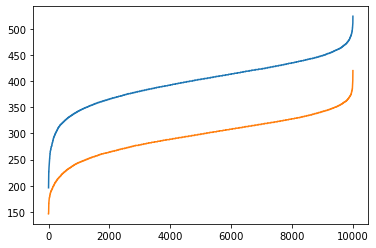

In [37]:
plt.plot(non_delta)
plt.plot(delta)
plt.show()

#The plot shows that applying delta encoding to MMP reduces the storage size